In [107]:
# dataset: https://mmspg.epfl.ch/food-image-datasets  (remove first mac leftover files in the directories )
import os
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.preprocessing import image
from keras import layers
import matplotlib.pyplot as plt
import shutil

training_dir = '/home/dimtsoun/dlav/food_5k/training'
validation_dir = '/home/dimtsoun/dlav/food_5k/validation'
testing_dir = '/home/dimtsoun/dlav/food_5k/evaluation'

files_train = os.listdir(training_dir)
y_train = np.zeros([len(files_train)])
paths_train = []


files_val = os.listdir(validation_dir)
y_val = np.zeros([len(files_val)])
paths_val = []


####################

food_train_dir = os.path.join(training_dir,'food')
os.mkdir(food_train_dir)
non_food_train_dir = os.path.join(training_dir,'nonfood')
os.mkdir(non_food_train_dir)


food_val_dir = os.path.join(validation_dir,'food')
os.mkdir(food_val_dir)
non_food_val_dir = os.path.join(validation_dir,'nonfood')
os.mkdir(non_food_val_dir)

###################

counter = 0
for file in (files_train):
    [label,file_ext] = file.split('_')
    file_path = os.path.join(training_dir,file)
    
    if label=='1':
        src = file_path
        dst = food_train_dir
        shutil.move(src,dst)
    else:
        src = file_path
        dst = non_food_train_dir
        shutil.move(src,dst)
            
        
    
#     paths_train.append(file_path)
#     y_train[counter] = label
#     counter += 1
    
    


counter = 0

for file in (files_val):
    [label,file_ext] = file.split('_')
    file_path = os.path.join(validation_dir,file)
    
    
#     paths_val.append(file_path)
#     y_val[counter] = label
#     counter += 1
    
    if label=='1':
        src = file_path
        dst = food_val_dir
        shutil.move(src,dst)
    else:
        src = file_path
        dst = non_food_val_dir
        shutil.move(src,dst)
    
    
# files_test = os.listdir(testing_dir)
# y_test = np.zeros([len(files_test)])
# paths_test = []

# counter = 0
# for file in (files_test):
#     [label,file_ext] = file.split('_')
#     file_path = os.path.join(testing_dir,file)
    
#     paths_test.append(file_path)
#     y_test[counter] = label
#     counter += 1
    

    
# training_data = pd.DataFrame(paths,y_train)
    
# training_data = pd.DataFrame(data={"path": paths_train, "label": y_train})
# validation_data = pd.DataFrame(data={"path":paths_val,"label":y_val})
# test_data = pd.DataFrame(data={"path":paths_test,"label":y_test})

In [109]:
print('Total number of food training images',len(os.listdir(food_train_dir)))
print('Total number of nonfood training images',len(os.listdir(non_food_train_dir)))
print('----')
print('Total number of food validation images',len(os.listdir(food_val_dir)))
print('Total number of nonfood validation images',len(os.listdir(non_food_val_dir)))

Total number of food training images 1500
Total number of nonfood training images 1500
----
Total number of food validation images 500
Total number of nonfood validation images 500


*Defining the Network*

In [110]:
model = Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [111]:
from keras import optimizers

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])


In [121]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)


train_generator = train_datagen.flow_from_directory(training_dir,target_size=(150,150),classes=['food','nonfood'],class_mode='binary',batch_size=20)

val_generator = val_datagen.flow_from_directory(validation_dir,target_size=(150,150),classes=['food','nonfood'],class_mode='binary',batch_size=20)


Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [122]:
for data_batch,labels_batch in train_generator:
    print('data shape',data_batch.shape)
    print('labels_shape',labels_batch.shape)
    break

data shape (20, 150, 150, 3)
labels_shape (20,)


In [123]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=10,validation_data=val_generator,validation_steps=50)

Epoch 1/10
100/100 [==============================] - 18s 183ms/step - loss: 0.5473 - acc: 0.7270 - val_loss: 0.5624 - val_acc: 0.7450
Epoch 2/10
100/100 [==============================] - 15s 151ms/step - loss: 0.4642 - acc: 0.7875 - val_loss: 0.4285 - val_acc: 0.8230
Epoch 3/10
100/100 [==============================] - 15s 149ms/step - loss: 0.4298 - acc: 0.8090 - val_loss: 0.3862 - val_acc: 0.8350
Epoch 4/10
100/100 [==============================] - 15s 154ms/step - loss: 0.3905 - acc: 0.8265 - val_loss: 0.5934 - val_acc: 0.6900
Epoch 5/10
100/100 [==============================] - 15s 149ms/step - loss: 0.3686 - acc: 0.8380 - val_loss: 0.3397 - val_acc: 0.8570
Epoch 6/10
100/100 [==============================] - 15s 151ms/step - loss: 0.3494 - acc: 0.8515 - val_loss: 0.3876 - val_acc: 0.8500
Epoch 7/10
100/100 [==============================] - 15s 151ms/step - loss: 0.3204 - acc: 0.8660 - val_loss: 0.3457 - val_acc: 0.8490
Epoch 8/10
100/100 [==============================] - 1

In [124]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

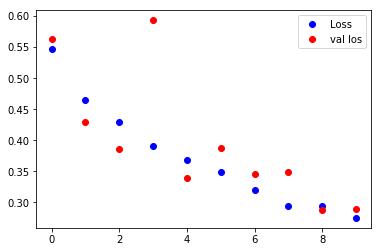

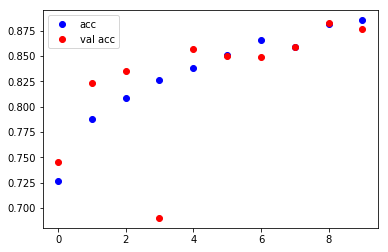

In [130]:
loss = history.history['loss']
acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']

plt.plot(loss,'bo',label='Loss')
plt.plot(val_loss,'ro',label='val los')
plt.legend()

plt.figure()

plt.plot(acc,'bo',label='acc')
plt.plot(val_acc,'ro',label='val acc')
plt.legend()


In [1]:
img_path = '/home/dimtsoun/dlav/food_5k/evaluation/0_9.jpg'

img = image.load_img(img_path,target_size=(150,150))
x = image.img_to_array(img)
x = x/255
x = x.reshape((1,)+x.shape)
# plt.imshow(x)


y_prob = model.predict_classes(x) # this returns the class

# y_prob = model.predict(x) # this returns probability (maybe..)?
print(y_prob)

NameError: name 'image' is not defined

In [154]:
label_map = (train_generator.class_indices)
print(label_map)

{'food': 0, 'nonfood': 1}
